In [15]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [16]:
#import dataset
data = pd.read_csv('advertising_sales_data.csv')
data.head(5)

,Year,Advertising_Expenditure,Sales
0,2019,162727,518248.9838
1,2018,137498,474420.4726
2,2017,187337,683338.4369
3,2016,104886,272485.6816
4,2015,160268,563836.9656


In [22]:
#adding the lag variable
data['Lag_Advertising'] = data['Advertising_Expenditure'].shift(-1)
data.head(15)

,Year,Advertising_Expenditure,Sales,Lag_Price,Lag_Advertising
0,2019,162727,518248.9838,137498.0,137498.0
1,2018,137498,474420.4726,187337.0,187337.0
2,2017,187337,683338.4369,104886.0,104886.0
3,2016,104886,272485.6816,160268.0,160268.0
4,2015,160268,563836.9656,169879.0,169879.0
5,2014,169879,575780.9294,153694.0,153694.0
6,2013,153694,421847.1212,181932.0,181932.0
7,2012,181932,608905.4417,196867.0,196867.0
8,2011,196867,557773.2618,171958.0,171958.0
9,2010,171958,503674.8654,NaN,NaN


In [23]:
data = data.dropna()
data.head(15)

,Year,Advertising_Expenditure,Sales,Lag_Price,Lag_Advertising
0,2019,162727,518248.9838,137498.0,137498.0
1,2018,137498,474420.4726,187337.0,187337.0
2,2017,187337,683338.4369,104886.0,104886.0
3,2016,104886,272485.6816,160268.0,160268.0
4,2015,160268,563836.9656,169879.0,169879.0
5,2014,169879,575780.9294,153694.0,153694.0
6,2013,153694,421847.1212,181932.0,181932.0
7,2012,181932,608905.4417,196867.0,196867.0
8,2011,196867,557773.2618,171958.0,171958.0


In [26]:
print('Correlation_matrix:')
data_corr = data.corr()
print(data_corr)

Correlation_matrix:
                             Year  Advertising_Expenditure     Sales  \
Year                     1.000000                -0.436905 -0.130704   
Advertising_Expenditure -0.436905                 1.000000  0.886140   
Sales                   -0.130704                 0.886140  1.000000   
Lag_Advertising         -0.508778                -0.188497 -0.320009   

                         Lag_Advertising  
Year                           -0.508778  
Advertising_Expenditure        -0.188497  
Sales                          -0.320009  
Lag_Advertising                 1.000000  


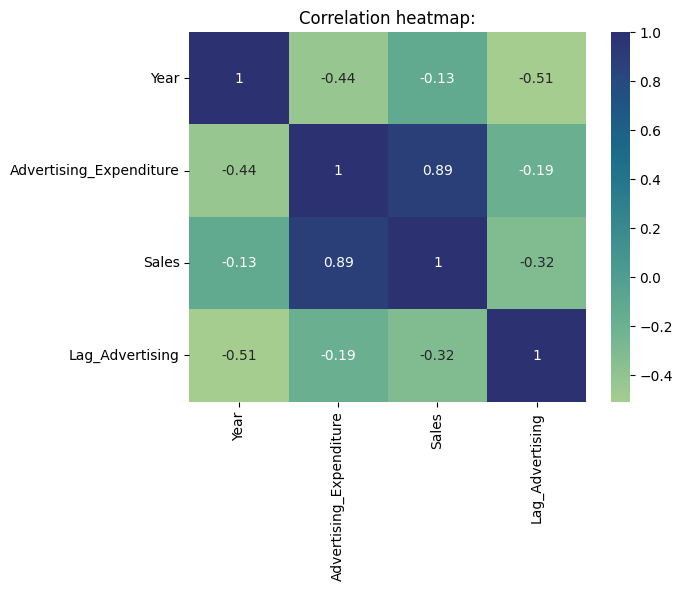

In [27]:
sns.heatmap(data_corr, annot = True, cmap = 'crest')
plt.title('Correlation heatmap:')
plt.show()

In [30]:
x = data[['Advertising_Expenditure', 'Lag_Advertising']]
sales = data['Sales']

In [34]:
#splitting to train and test dataset
x_train, x_test, sales_train, sales_test = train_test_split(x, sales, test_size = .2, random_state = 45)

In [36]:
#adding constant to the independent variable
x_constant = sm.add_constant(x)

In [37]:
#fitting the model
model = sm.OLS(sales, x_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     12.75
Date:                Fri, 25 Apr 2025   Prob (F-statistic):            0.00691
Time:                        21:41:37   Log-Likelihood:                -109.99
No. Observations:                   9   AIC:                             226.0
Df Residuals:                       6   BIC:                             226.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

c:\users\cmoradajr\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)
